In [11]:
import pandas
import numpy
import matplotlib.pyplot as plt
from Bio import SeqIO
import re
import coralme
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
pandas.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
Trends = {
    "rna" :{
        "m" : pandas.read_csv("./datasets/performance/rna-mmodel.csv",index_col=0),
        "me" : pandas.read_csv("./datasets/performance/rna-memodel.csv",index_col=0),
    },
    "ribo" :{
        "m" : pandas.read_csv("./datasets/performance/ribo-mmodel.csv",index_col=0),
        "me" : pandas.read_csv("./datasets/performance/ribo-memodel.csv",index_col=0),
    },
    "te" :{
        "m" : pandas.read_csv("./datasets/performance/te-mmodel.csv",index_col=0),
        "me" : pandas.read_csv("./datasets/performance/te-memodel.csv",index_col=0),
    }
}

In [13]:
df = Trends["ribo"]["me"].sort_values("predicted")
df.head()

,level_1,value,ci_low,ci_upp,fit,predicted
subsystem,,,,,,
Metabolic:S_Nucleotide_Salvage_Pathway,PPutida_4,3.082391,1.455843,3.624674,2.540259,0.0
Metabolic:S_Aromatic_Compounds_Degradation__Gallic_acid_Metabolism,PPutida_2,1.738541,1.455843,3.624674,2.540259,0.0
Metabolic:S_Aromatic_Compounds_Degradation__Gallic_acid_Metabolism,PPutida_1,1.679181,1.455843,3.624674,2.540259,0.0
Metabolic:S_Cysteine_Metabolism,PPutida_4,2.975032,1.455843,3.624674,2.540259,0.0
Metabolic:S_Fatty_Acid_Metabolism,PPutida_1,3.738129,1.455843,3.624674,2.540259,0.0


In [14]:
colors = ["#2b83ba","#66bd63","#fdae61"]
# ylim = {"rna":[-2,3.2],"ribo":[0,6],"te":[1,6],"m":[-0.1,2.5],"me":[-0.2,7]}

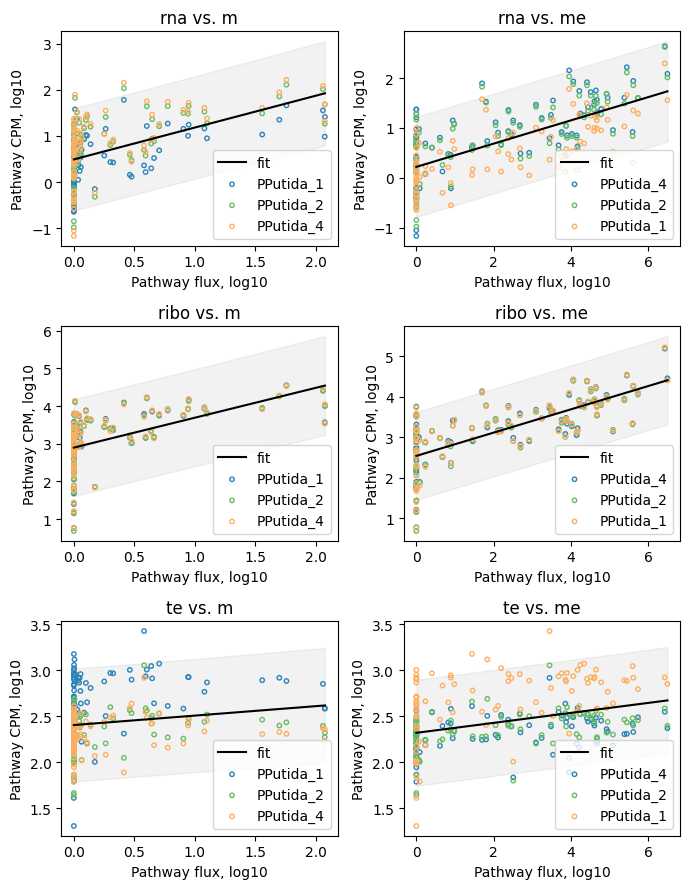

In [15]:
fig,ax = plt.subplots(3,2,figsize=(7,9))
def plot(df,ax,title):
    df = df.sort_values("predicted")
    ax.fill_between(df["predicted"],df["ci_low"],df["ci_upp"],color="gray",alpha=0.1)
    df.plot(x="predicted",y="fit",ax=ax,color="black")
    for idx,s in enumerate(df["level_1"].unique()):
        slice = df[df["level_1"]==s]
        ax.scatter(slice["predicted"],slice["value"],
                   label=s,facecolors='none',edgecolors=colors[idx],s=10)
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Pathway flux, log10")
    ax.set_ylabel("Pathway CPM, log10")
for i,(datatype,dct) in enumerate(Trends.items()):
    for j,(modeltype,df) in enumerate(dct.items()):
        plot(df,ax[i,j],"{} vs. {}".format(datatype,modeltype))
        # ax[i,j].set_ylim(ylim[datatype])
        # ax[i,j].set_xlim(ylim[modeltype])
fig.tight_layout()
plt.savefig("./figures/performance-plots.svg",format="svg")